## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [2]:
# Combine the data into a single dataset
# mouse_metadata.head()
# study_results.head()
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group combined set by drug regimen
drug_groups = combined.groupby("Drug Regimen")

# create new DF with variables to calculate above values
summary_table = pd.DataFrame({
    "Mean Tumor Vol": drug_groups["Tumor Volume (mm3)"].mean(),
    "Median Tumor Vol": drug_groups["Tumor Volume (mm3)"].median(),
    "Tumor Vol Variance": drug_groups["Tumor Volume (mm3)"].var(),
    "Tumor Vol Std Dev": drug_groups["Tumor Volume (mm3)"].std(),
    "Tumor Vol SEM": drug_groups["Tumor Volume (mm3)"].sem()
})

# print DF
summary_table

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = combined['Drug Regimen'].value_counts()
counts


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

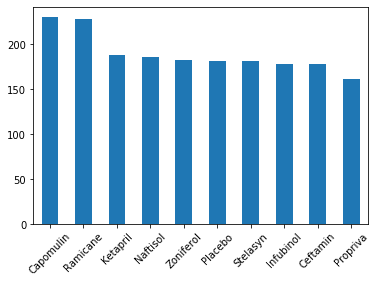

In [5]:
#creates graph
counts.plot.bar(rot=45)

([<matplotlib.axis.XTick at 0x1c50930b7c8>,
 <a list of 10 Text xticklabel objects>)

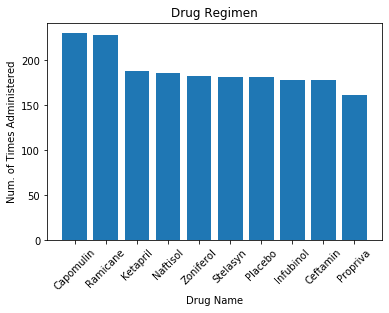

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_name = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"]
drug_adm = [230,228,188,186,182,181,181,178,178,161]
x_axis = np.arange(len(drug_adm))
plt.bar(x_axis, drug_adm)

# create title and labels
plt.title("Drug Regimen")
plt.ylabel("Num. of Times Administered")
plt.xlabel("Drug Name")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name, rotation=45)

## Pie plots

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = combined['Sex'].value_counts()
sex_counts

Male      958
Female    935
Name: Sex, dtype: int64

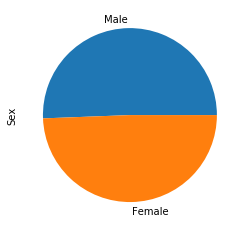

In [8]:
sex_counts.plot.pie()

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# build data for chart
sex = ["Male","Female"]
sex_num = [958,935]
colors = ["blue","orange"]
explode = [0.1,0]

(-1.2076939577793158,
 1.1101719390349558,
 -1.1065652022428258,
 1.1003126286782299)

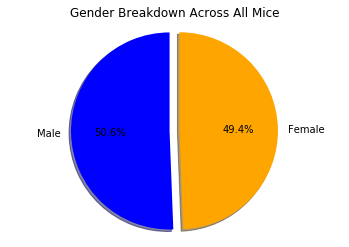

In [10]:
# create chart
plt.pie(sex_num, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

# add title to chart
plt.title("Gender Breakdown Across All Mice")

# keeps circle proportionate
plt.axis("equal")

## Quartiles, outliers and boxplots

In [11]:
# THE BELOW CODE IS NOT USED BUT WAS MY INITIAL THOUGHT PROCESS FOR GROUPING THE DATA BY TIMEPOINT

# # make new df to find final tumor vol per mouse
# combined2 = combined[['Mouse ID', 'Drug Regimen', 'Timepoint','Tumor Volume (mm3)']]
# # combined2.head()

# # make index of mouse ID and find final tumor vol, make DF for it
# combined2_rev = combined2.set_index(['Mouse ID'])
# combined2_df = pd.DataFrame(combined2_rev.loc[combined2_rev['Timepoint'] == 45])
# # combined2_df

# # make new df for just Capomulin, Ramicane, Infubinol, and Ceftamin data (probably could have combined this
# # and the last bit into one line or DF but it's easier for me to visualize this way)
# array = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# tum_final_vol_df = combined2_df.loc[combined2_df['Drug Regimen'].isin(array)]
# # tum_final_vol_df

In [12]:
# # Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Generate separate dataframes for each drug in order to plot results
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = combined.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = combined[['Mouse ID','Timepoint']].merge(combined,on=['Mouse ID','Timepoint'],how="left")
capomulin_df = merge_data.loc[merge_data["Drug Regimen"]=="Capomulin"]['Tumor Volume (mm3)']
ceftamin_df = merge_data.loc[merge_data["Drug Regimen"]=="Ceftamin"]['Tumor Volume (mm3)']
ramicane_df = merge_data.loc[merge_data["Drug Regimen"]=="Ramicane"]['Tumor Volume (mm3)']
infubinol_df = merge_data.loc[merge_data["Drug Regimen"]=="Infubinol"]['Tumor Volume (mm3)']

# finding IQR values for each drug - capomulin
cap_finals = capomulin_df
cap_quarts = cap_finals.quantile([.25,.5,.75])
cap_lowerq = cap_quarts[0.25]
cap_upperq = cap_quarts[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_b = cap_lowerq - (1.5*cap_iqr)
cap_upper_b = cap_upperq + (1.5*cap_iqr)

# ramicane
ram_finals = ramicane_df
ram_quarts = ram_finals.quantile([.25,.5,.75])
ram_lowerq = ram_quarts[0.25]
ram_upperq = ram_quarts[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_b = ram_lowerq - (1.5*ram_iqr)
ram_upper_b = ram_upperq + (1.5*ram_iqr)

# infubinol
inf_finals = infubinol_df
inf_quarts = inf_finals.quantile([.25,.5,.75])
inf_lowerq = inf_quarts[0.25]
inf_upperq = inf_quarts[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_b = inf_lowerq - (1.5*inf_iqr)
inf_upper_b = inf_upperq + (1.5*inf_iqr)

# ceftamin
cef_finals = ceftamin_df
cef_quarts = cef_finals.quantile([.25,.5,.75])
cef_lowerq = cef_quarts[0.25]
cef_upperq = cef_quarts[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_b = cef_lowerq - (1.5*cef_iqr)
cef_upper_b = cef_upperq + (1.5*cef_iqr)

# print findings
print(f"The interquartile range and possible outliers for the final tumor volumes for each drug is as follows:")
print(f"Capomulin IQR - {cap_iqr}. Values below {cap_lower_b} and above {cap_upper_b} could be outliers.") 
print(f"Ramicane IQR - {ram_iqr}. Values below {ram_lower_b} and above {ram_upper_b} could be outliers.")
print(f"Infubinol IQR - {inf_iqr}. Values below {inf_lower_b} and above {inf_upper_b} could be outliers.")
print(f"Ceftamin IQR - {cef_iqr}. Values below {cef_lower_b} and above {cef_upper_b} could be outliers.")


The interquartile range and possible outliers for the final tumor volumes for each drug is as follows:
Capomulin IQR - 7.314067135000002. Values below 26.714832162499995 and above 55.9711007025 could be outliers.
Ramicane IQR - 8.325365415000007. Values below 24.18658646249998 and above 57.48804812250001 could be outliers.
Infubinol IQR - 10.002090667500006. Values below 32.309217298749985 and above 72.31757996875001 could be outliers.
Ceftamin IQR - 9.5930104575. Values below 32.818911426250004 and above 71.19095325625 could be outliers.


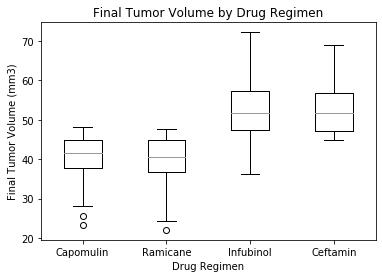

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin_df,ramicane_df,infubinol_df,ceftamin_df],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.title('Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

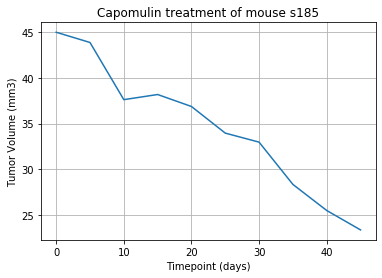

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_group = combined.groupby(["Mouse ID"])
mouse_group_df = pd.DataFrame({
    "Mouse ID":combined["Mouse ID"],
    "Timepoint":combined["Timepoint"],
    "Tumor Volume":combined["Tumor Volume (mm3)"]})
# mouse_group_df

s185_df = pd.DataFrame(mouse_group_df.loc[mouse_group_df["Mouse ID"] == "s185"]["Tumor Volume"])
# s185_df

# set axes
x_axis = [0,5,10,15,20,25,30,35,40,45]
y_axis = s185_df["Tumor Volume"]

# line
plt.plot(x_axis,y_axis)
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

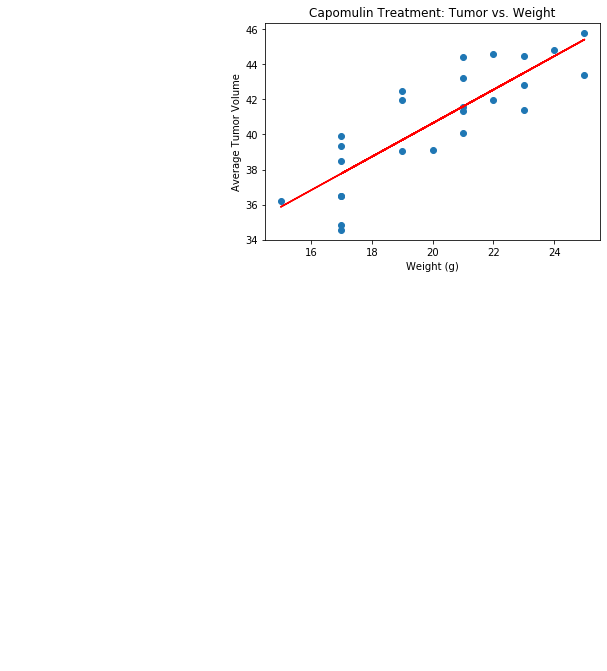

The correlation coefficient between weight and color tumor volume is 0.84


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# make df for capomulin data
capo_df2 = combined[combined["Drug Regimen"] == "Capomulin"]

# make new df to calculate mean vals
capo_df3 = capo_df2.groupby(["Mouse ID","Weight (g)"]).mean()["Tumor Volume (mm3)"].to_frame()
capo_df3 = capo_df3.reset_index()
# capo_df3

# assign axes to columns
x_axis = capo_df3['Weight (g)']
y_axis = capo_df3['Tumor Volume (mm3)']

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Capomulin Treatment: Tumor vs. Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.savefig("Regression.png")
plt.show()
print(f"The correlation coefficient between weight and color tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")



